### Requirements

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Load data

In [24]:
df = pd.read_excel('data/dataset.xlsx')
df.shape

(25010, 11)

### Describe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SUIT_1  25010 non-null  int64
 1   RANK_1  25010 non-null  int64
 2   SUIT_2  25010 non-null  int64
 3   RANK_2  25010 non-null  int64
 4   SUIT_3  25010 non-null  int64
 5   RANK_3  25010 non-null  int64
 6   SUIT_4  25010 non-null  int64
 7   RANK_4  25010 non-null  int64
 8   SUIT_5  25010 non-null  int64
 9   RANK_5  25010 non-null  int64
 10  Mano    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SUIT_1,25010.0,2.508756,1.116483,1.0,2.0,3.0,4.0,4.0
RANK_1,25010.0,6.995242,3.749805,1.0,4.0,7.0,10.0,13.0
SUIT_2,25010.0,2.497721,1.121767,1.0,1.0,2.0,4.0,4.0
RANK_2,25010.0,7.014194,3.766974,1.0,4.0,7.0,10.0,13.0
SUIT_3,25010.0,2.510236,1.123148,1.0,2.0,3.0,4.0,4.0
RANK_3,25010.0,7.014154,3.744974,1.0,4.0,7.0,10.0,13.0
SUIT_4,25010.0,2.495922,1.116009,1.0,1.0,2.0,3.0,4.0
RANK_4,25010.0,6.942463,3.747147,1.0,4.0,7.0,10.0,13.0
SUIT_5,25010.0,2.497321,1.118732,1.0,1.0,3.0,3.0,4.0
RANK_5,25010.0,6.962735,3.741579,1.0,4.0,7.0,10.0,13.0


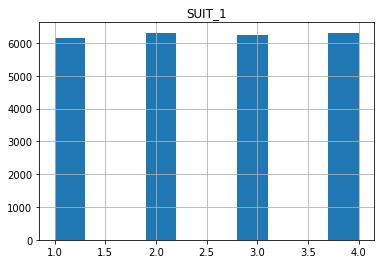

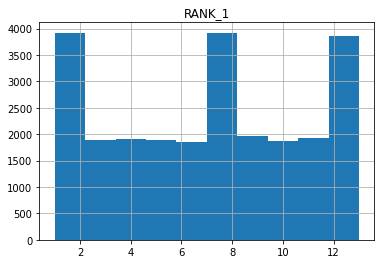

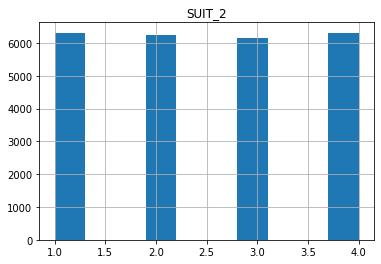

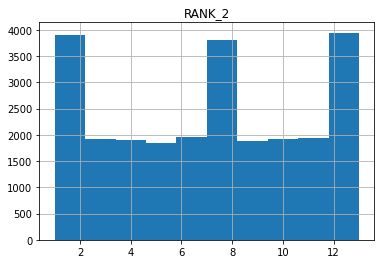

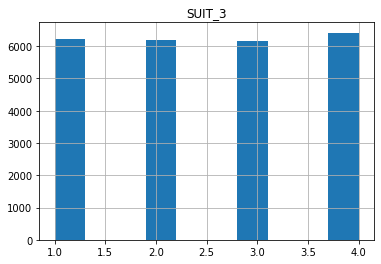

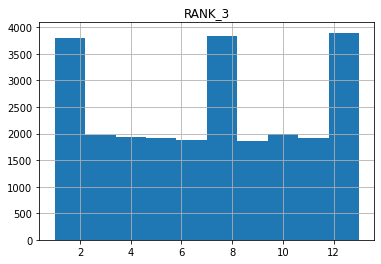

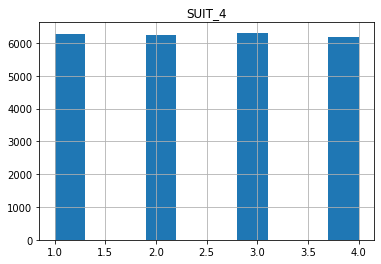

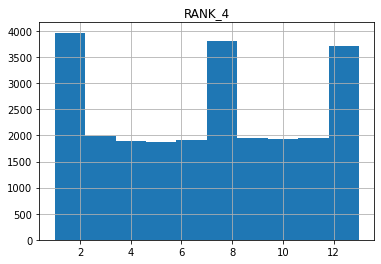

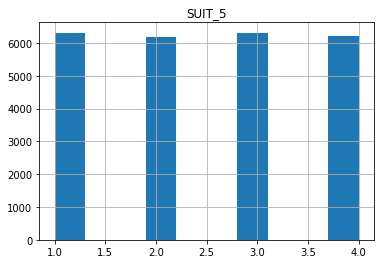

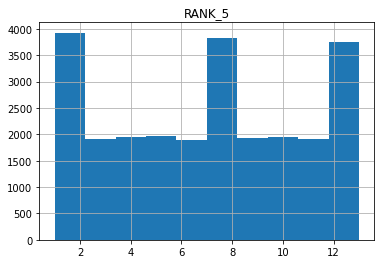

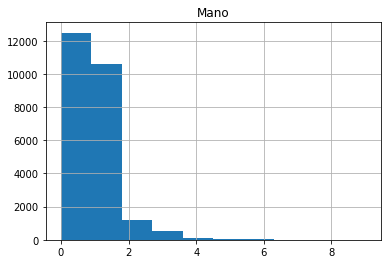

In [ ]:
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()

c:\Users\juplo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\juplo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\juplo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


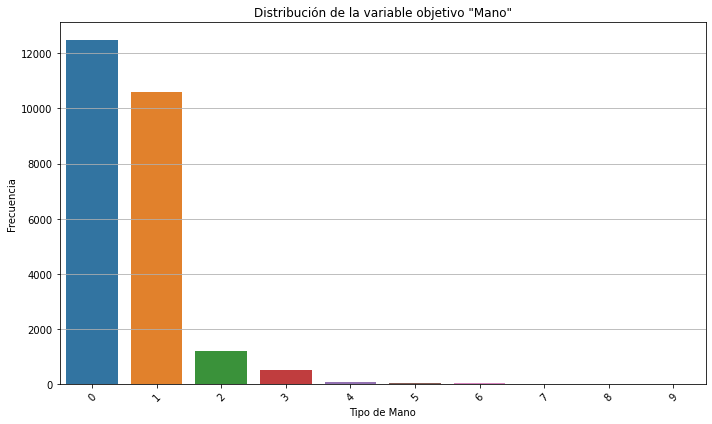

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the distribution of 'Mano'
plt.figure(figsize=(10, 6))
sns.countplot(x='Mano', data=df)
plt.title('Distribución de la variable objetivo "Mano"')
plt.xlabel('Tipo de Mano')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
df['Mano'].value_counts(normalize=True)*100


Mano
0    49.952019
1    42.379048
2     4.822071
3     2.051180
4     0.371851
5     0.215914
6     0.143942
7     0.023990
9     0.019992
8     0.019992
Name: proportion, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separando las características y la variable objetivo
X = df.drop('Mano', axis=1)
y = df['Mano']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificando las dimensiones de los conjuntos de entrenamiento y prueba
(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)




((20008, 10), (5002, 10), (20008,), (5002,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Inicializando los modelos
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
neural_network_model = MLPClassifier(max_iter=1000, random_state=42)

# Lista de modelos para iterar
models = [
    ("Logistic Regression", logistic_model),
    ("Decision Tree", decision_tree_model),
    ("Random Forest", random_forest_model),
    ("SVM", svm_model),
    ("Neural Network", neural_network_model)
]

# Entrenando y evaluando cada modelo
results = {}
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results_sorted = sorted(results.items(), key=lambda x: x[1], reverse=True)
results_sorted


[('Neural Network', 0.6809276289484206),
 ('Random Forest', 0.6117552978808477),
 ('SVM', 0.5581767293082767),
 ('Logistic Regression', 0.5101959216313474),
 ('Decision Tree', 0.48660535785685727)]

In [ ]:
# Creando el modelo de Bosque Aleatorio con el peso de las clases balanceado
balanced_random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenando el modelo
balanced_random_forest_model.fit(X_train_scaled, y_train)

# Evaluando el modelo
y_pred_balanced_rf = balanced_random_forest_model.predict(X_test_scaled)
accuracy_balanced_rf = accuracy_score(y_test, y_pred_balanced_rf)

accuracy_balanced_rf


0.5975609756097561

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definiendo el espacio de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Creando el modelo de Bosque Aleatorio para la búsqueda
rf_model_for_search = RandomForestClassifier(random_state=42, class_weight='balanced')

# Búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(rf_model_for_search, param_dist, n_iter=10, cv=3, random_state=42)

# Ejecutando la búsqueda
random_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros encontrados
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score

({'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20},
 0.5818170012309785)

In [ ]:
# Creando y entrenando el modelo con los mejores hiperparámetros encontrados
optimized_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    max_depth=best_params['max_depth'],
    random_state=42,
    class_weight='balanced'
)

optimized_rf_model.fit(X_train_scaled, y_train)

# Evaluando el modelo optimizado
y_pred_optimized_rf = optimized_rf_model.predict(X_test_scaled)
accuracy_optimized_rf = accuracy_score(y_test, y_pred_optimized_rf)

accuracy_optimized_rf


0.6025589764094362